# Parts of the code are inspired by the customer churn video referenced in the report. (Neuron, 2019).

# 1. Import Data 

In [25]:
# Dataset used from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
dataset = pd.read_csv('CustomerData.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. Clean Data 

In [9]:
import pandas as pd
dataset = pd.read_csv('CustomerData.csv')

dataset = pd.get_dummies(dataset, columns=['Contract'])


# Drop columns I don’t want in the model
X = dataset.drop(columns=['customerID', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                          'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
                 axis=1)
# y is what I want to predict
y = dataset['Churn']

# Convert string values to numerical values
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in X.columns:
    if X[col].nunique() == 2:
        unique_vals = X[col].dropna().unique()
        if set(unique_vals).issubset(set(binary_map.keys())):
            X[col] = X[col].map(binary_map)


X

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,True,False,False
1,1,0,0,0,34,False,True,False
2,1,0,0,0,2,True,False,False
3,1,0,0,0,45,False,True,False
4,0,0,0,0,2,True,False,False
...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,False,True,False
7039,0,0,1,1,72,False,True,False
7040,0,0,1,1,11,True,False,False
7041,1,1,1,0,4,True,False,False


## Customer Tenure Graph

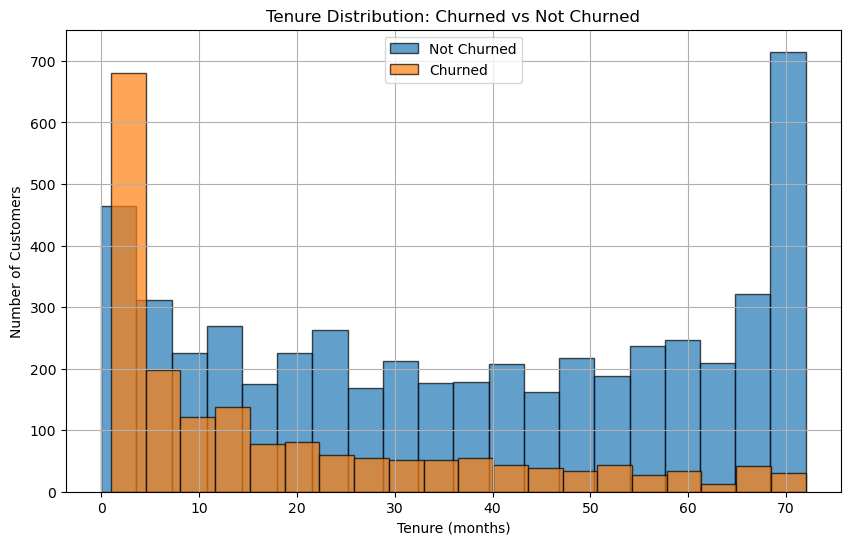

In [10]:
# Graph to display customers correlating tenure and churn

import matplotlib.pyplot as plt

df = pd.concat([X, y], axis=1)

plt.figure(figsize=(10, 6))
plt.hist(df[df['Churn'] == 'No']['tenure'], bins=20, alpha=0.7, label='Not Churned', edgecolor='black')
plt.hist(df[df['Churn'] == 'Yes']['tenure'], bins=20, alpha=0.7, label='Churned', edgecolor='black')

plt.title('Tenure Distribution: Churned vs Not Churned')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()



In [11]:
# Mapping categorical string value to binary

X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})

X

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract_Month-to-month,Contract_One year,Contract_Two year
0,NaN,0,1,0,1,True,False,False
1,NaN,0,0,0,34,False,True,False
2,NaN,0,0,0,2,True,False,False
3,NaN,0,0,0,45,False,True,False
4,NaN,0,0,0,2,True,False,False
...,...,...,...,...,...,...,...,...
7038,NaN,0,1,1,24,False,True,False
7039,NaN,0,1,1,72,False,True,False
7040,NaN,0,1,1,11,True,False,False
7041,NaN,1,1,0,4,True,False,False


# 3. Split Into Training and Test Sets

In [12]:
# 80% data training model / 20% test to validate model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Confirm 80% of customers to train
X_train.shape

(5634, 8)

In [14]:
# Confirm 20% of customer to test
X_test.shape

(1409, 8)

In [15]:
# Confirm the number of categories for X after cleaning up original data
len(X_train.columns)

8

# 4. Build The Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

# 5. Make Predictions

In [17]:
y_pred = rf.predict(X_test)

In [18]:
# Probabilities of churn by ranking customers by risk
y_proba = rf.predict_proba(X_test)[:, 1]


# 6. Evaluate Performance Metrics

In [19]:
# View classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))  # or 0

# Check percentage of customers churning
print(y.value_counts(normalize=True))

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1036
         Yes       1.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.87      0.50      0.42      1409
weighted avg       0.81      0.74      0.62      1409

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


# 7. Data Visualization

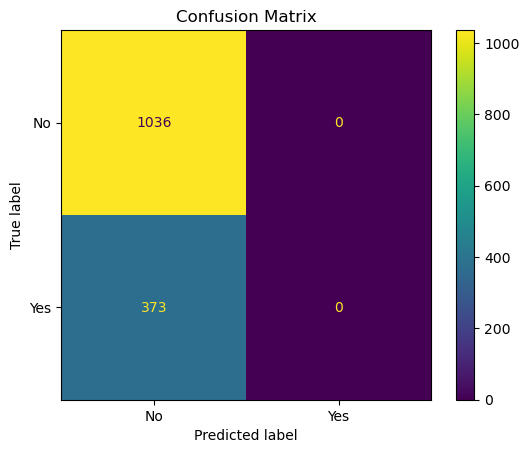

In [20]:
# Confusion Matrix Figure

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


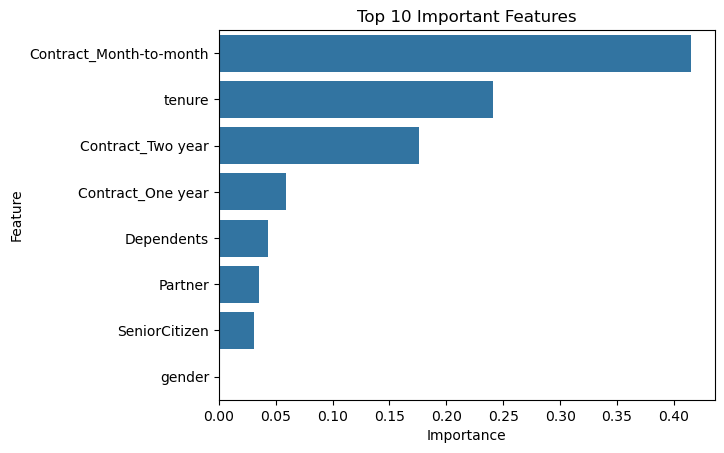

In [21]:
# Feature Importance

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top features
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


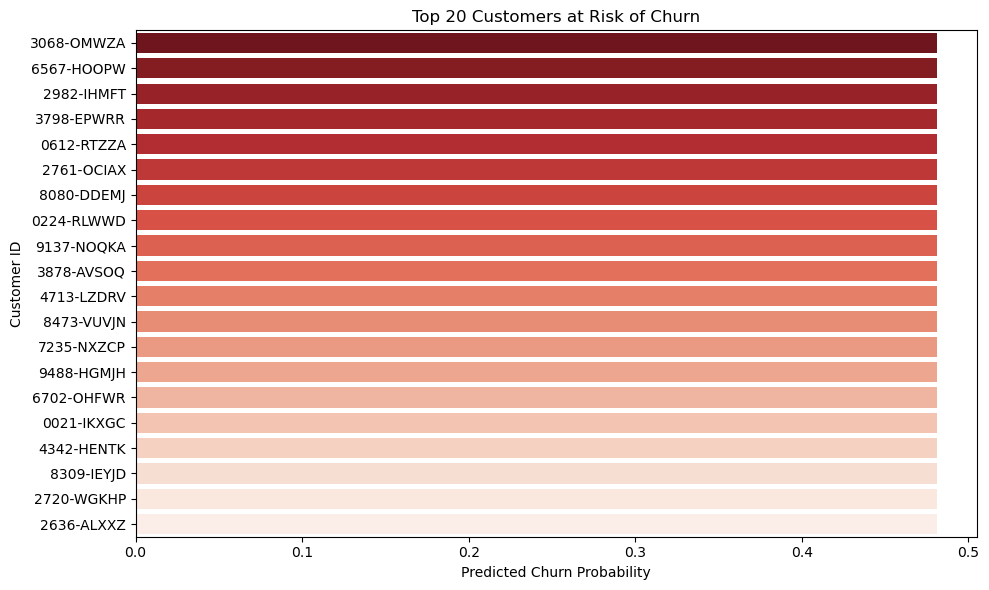

In [22]:
# Churn Risk of Customers 

# Predict probabilities
dataset['Churn_Probability'] = rf.predict_proba(X)[:, 1]

# Sort by highest risk
top_risk = dataset[['customerID', 'Churn_Probability']].sort_values(by='Churn_Probability', ascending=False).head(20)

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Churn_Probability', y='customerID', data=top_risk, hue='customerID', palette='Reds_r', dodge=False, legend=False)
plt.title('Top 20 Customers at Risk of Churn')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


# 8. Save The Model

In [24]:
import joblib
joblib.dump(rf, 'churn_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')


['model_features.pkl']